In [1]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as smf
import statsmodels.formula.api as ols

# READING WORLD BANK DATA 

In [2]:
# Reading in Per Capita Energy Consumption Data
energy_url='http://api.worldbank.org/v2/en/indicator/EG.USE.PCAP.KG.OE?downloadformat=excel'
energy0=pd.read_excel(energy_url, 
                     sheet_name='Data', 
                     skiprows=3, 
                     index_col=0, 
                     usecols=range(270)
                        )
energy0.head()


# Reading in Per Capita GDP  Data
gdp_url='http://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=excel'
gdp0=pd.read_excel(gdp_url, 
                     sheet_name='Data', 
                     skiprows=3, 
                     index_col=0, 
                     usecols=range(270)
                        )
gdp0.head()

# Reading in % Urban Population In Each Country
urban_url='http://api.worldbank.org/v2/en/indicator/SP.URB.TOTL.IN.ZS?downloadformat=excel'
urban0=pd.read_excel(urban_url, 
                     sheet_name='Data', 
                     skiprows=3, 
                     index_col=0, 
                     usecols=range(270)
                        )
urban0.head()


# Reading in % Contribution Of Services to Total GDP
services_url='http://api.worldbank.org/v2/en/indicator/NV.SRV.TOTL.ZS?downloadformat=excel'
services0=pd.read_excel(services_url, 
                     sheet_name='Data', 
                     skiprows=3, 
                     index_col=0, 
                     usecols=range(270)
                        )
services0.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,"Services, value added (% of GDP)",NV.SRV.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,"Services, value added (% of GDP)",NV.SRV.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.845046,45.546360,49.136875,50.047861,51.460822,52.967859,53.245535,53.433183,53.019817,NaN
Angola,AGO,"Services, value added (% of GDP)",NV.SRV.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,ALB,"Services, value added (% of GDP)",NV.SRV.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.699235,45.317384,44.025486,44.256368,44.954621,44.607005,45.782515,46.284330,46.674729,47.259666
Andorra,AND,"Services, value added (% of GDP)",NV.SRV.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.257575,77.512951,78.068718,78.031031,78.495506,79.281787,79.537112,80.008836,79.204487,NaN


# CLEANING UP DATA 

In [3]:
# Extracting only Energy Consumption, GDP Per-Capita, Urban Population %, and Services Contirbution 
energy=energy0[['2014']].dropna()
gdp=gdp0[['2014']].dropna()
urban=urban0[['2014']].dropna()
services=services0[['2014']].dropna()

energy=energy.reset_index()
gdp=gdp.reset_index()
urban=urban.reset_index()
services=services.reset_index()

# Renaming the columns
gdp.columns=['Country','GDP']
energy.columns=['Country','Energy']
urban.columns=['Country','Urban']
services.columns=['Country','Services']

In [4]:
# Merging all data into the same dataframe
data=pd.merge(energy.assign(Country=energy.Country.astype(str)),gdp.assign(Country=gdp.Country.astype(str)), how='inner',on='Country')
data=pd.merge(data.assign(Country=data.Country.astype(str)),urban.assign(Country=urban.Country.astype(str)), how='inner',on='Country')
data=pd.merge(data.assign(Country=data.Country.astype(str)),services.assign(Country=services.Country.astype(str)), how='inner',on='Country')

data.head()

,Country,Energy,GDP,Urban,Services
0,Albania,808.455840,4578.666728,56.423000,45.782515
1,Arab World,1953.286680,7452.814677,57.557605,40.855709
2,United Arab Emirates,7769.234738,44443.061514,85.375000,38.805326
3,Argentina,2015.187040,12245.256449,91.377000,52.940543
4,Armenia,1018.071240,3994.712355,63.112000,47.413044


# REGRESSION ANALYSIS

In [5]:
# Regressing Energy Consumption against Per-Capita GDP
p=data[['GDP']]
p=smf.add_constant(p)

t=data[['Energy']]

model=smf.OLS(t,p).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     121.0
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           3.97e-21
Time:                        20:36:53   Log-Likelihood:                -1417.4
No. Observations:                 156   AIC:                             2839.
Df Residuals:                     154   BIC:                             2845.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        968.0536    223.430      4.333      0.0

In [6]:
# Regressing Energy Consumption against Per-Capita GDP and Urban Population %

p=data[['GDP','Urban']]
p=smf.add_constant(p)

t=data[['Energy']]

model=smf.OLS(t,p).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     66.19
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           1.94e-21
Time:                        20:36:53   Log-Likelihood:                -1414.0
No. Observations:                 156   AIC:                             2834.
Df Residuals:                     153   BIC:                             2843.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -525.6395    611.700     -0.859      0.3

In [7]:
# Regressing Energy Consumption against Per-Capita GDP, Urban Pop.%, and Services Contribution to GDP - BEST MODEL
p=data[['GDP','Urban','Services']]
p=smf.add_constant(p)

t=data[['Energy']]

model=smf.OLS(t,p).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     61.34
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           4.80e-26
Time:                        20:36:53   Log-Likelihood:                -1400.8
No. Observations:                 156   AIC:                             2810.
Df Residuals:                     152   BIC:                             2822.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3284.0911    912.860      3.598      0.0

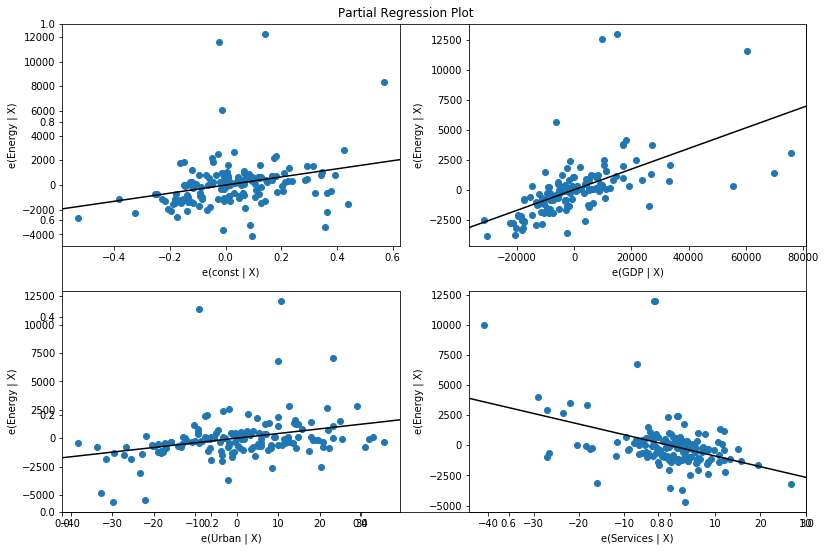

In [8]:
fig, ax=plt.subplots(figsize=(12,8))
fig = smf.graphics.plot_partregress_grid(model, fig=fig)

# Adding more years of data

In [9]:
######## 2013 DATA #########
energy_13=energy0[['2013']].dropna()
gdp_13=gdp0[['2013']].dropna()
urban_13=urban0[['2013']].dropna()
services_13=services0[['2013']].dropna()

energy_13=energy_13.reset_index()
gdp_13=gdp_13.reset_index()
urban_13=urban_13.reset_index()
services_13=services_13.reset_index()

gdp_13.columns=['Country','GDP']
energy_13.columns=['Country','Energy']
urban_13.columns=['Country','Urban']
services_13.columns=['Country','Services']

data_13=pd.merge(energy_13.assign(Country=energy_13.Country.astype(str)),gdp_13.assign(Country=gdp_13.Country.astype(str)), how='inner',on='Country')
data_13=pd.merge(data_13.assign(Country=data_13.Country.astype(str)),urban_13.assign(Country=urban_13.Country.astype(str)), how='inner',on='Country')
data_13=pd.merge(data_13.assign(Country=data_13.Country.astype(str)),services_13.assign(Country=services_13.Country.astype(str)), how='inner',on='Country')



######## 2012 DATA #########

energy_12=energy0[['2012']].dropna()
gdp_12=gdp0[['2012']].dropna()
urban_12=urban0[['2012']].dropna()
services_12=services0[['2012']].dropna()

energy_12=energy_12.reset_index()
gdp_12=gdp_12.reset_index()
urban_12=urban_12.reset_index()
services_12=services_12.reset_index()

gdp_12.columns=['Country','GDP']
energy_12.columns=['Country','Energy']
urban_12.columns=['Country','Urban']
services_12.columns=['Country','Services']

data_12=pd.merge(energy_12.assign(Country=energy_12.Country.astype(str)),gdp_12.assign(Country=gdp_12.Country.astype(str)), how='inner',on='Country')
data_12=pd.merge(data_12.assign(Country=data_12.Country.astype(str)),urban_12.assign(Country=urban_12.Country.astype(str)), how='inner',on='Country')
data_12=pd.merge(data_12.assign(Country=data_12.Country.astype(str)),services_12.assign(Country=services_12.Country.astype(str)), how='inner',on='Country')


######## 2011 DATA #########

energy_11=energy0[['2011']].dropna()
gdp_11=gdp0[['2011']].dropna()
urban_11=urban0[['2011']].dropna()
services_11=services0[['2011']].dropna()

energy_11=energy_11.reset_index()
gdp_11=gdp_11.reset_index()
urban_11=urban_11.reset_index()
services_11=services_11.reset_index()

gdp_11.columns=['Country','GDP']
energy_11.columns=['Country','Energy']
urban_11.columns=['Country','Urban']
services_11.columns=['Country','Services']

data_11=pd.merge(energy_11.assign(Country=energy_11.Country.astype(str)),gdp_11.assign(Country=gdp_11.Country.astype(str)), how='inner',on='Country')
data_11=pd.merge(data_11.assign(Country=data_11.Country.astype(str)),urban_11.assign(Country=urban_11.Country.astype(str)), how='inner',on='Country')
data_11=pd.merge(data_11.assign(Country=data_11.Country.astype(str)),services_11.assign(Country=services_11.Country.astype(str)), how='inner',on='Country')



In [10]:
data=data.append(data_13)

data=data.append(data_12)

data=data.append(data_11)
data=data.reset_index()


                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     249.9
Date:                Fri, 21 Dec 2018   Prob (F-statistic):          3.61e-107
Time:                        20:36:54   Log-Likelihood:                -5746.0
No. Observations:                 641   AIC:                         1.150e+04
Df Residuals:                     637   BIC:                         1.152e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2415.2370    402.480      6.001      0.0

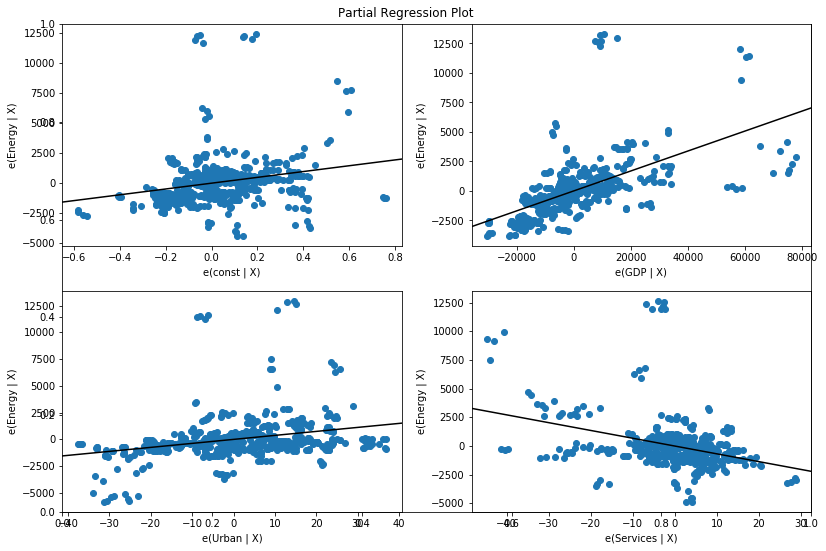

In [11]:
p=data[['GDP','Urban','Services']]
#p=data[['2014_GDP']]
p=smf.add_constant(p)
p.head()

t=data[['Energy']]
t.head()

model=smf.OLS(t,p).fit()
print(model.summary())


fig, ax=plt.subplots(figsize=(12,8))
fig = smf.graphics.plot_partregress_grid(model, fig=fig)

In [12]:
combined_model_coeff = list(model.tvalues)

# Splitting into High, middle and low income countries

In [13]:
data=data.reset_index()
data.sort_values('GDP',ascending=False).head()

,level_0,index,Country,Energy,GDP,Urban,Services
90,90,90,Luxembourg,6861.106667,119225.380023,89.884,77.599543
569,569,90,Luxembourg,8056.404301,115761.507705,88.906,78.306119
245,245,89,Luxembourg,7312.154005,113625.132900,89.574,78.125206
407,407,90,Luxembourg,7722.190204,106749.013623,89.249,78.256920
264,264,108,Norway,6415.990714,103059.248228,80.286,52.624111


In [14]:
data_high=data[data['GDP']>15000]

In [15]:
data_low=data[data['GDP']<5000]

In [16]:
data_middle=data[(data['GDP']<=15000) & (data['GDP']>=5000)]

# High Income

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     44.03
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           8.52e-22
Time:                        20:36:54   Log-Likelihood:                -1866.3
No. Observations:                 200   AIC:                             3741.
Df Residuals:                     196   BIC:                             3754.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8647.4280   1557.583      5.552      0.0

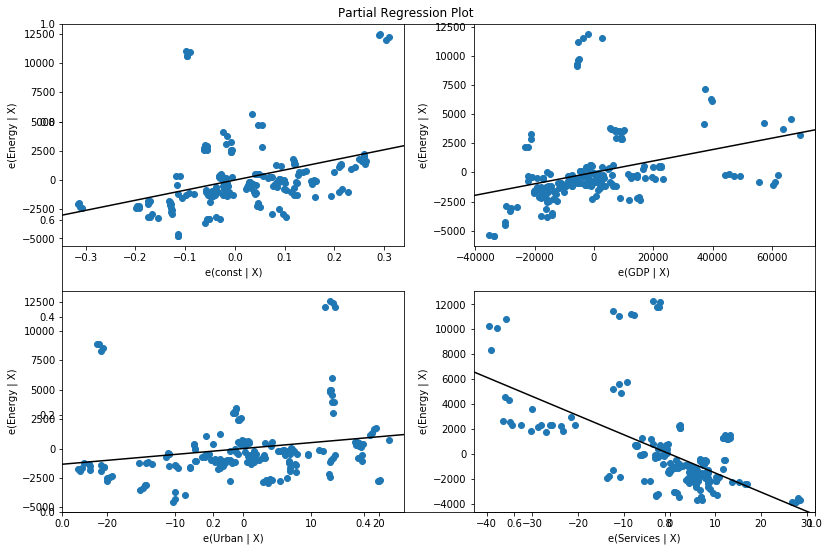

In [17]:
p=data_high[['GDP','Urban','Services']]
#p=data[['2014_GDP']]
p=smf.add_constant(p)
p.head()

t=data_high[['Energy']]
t.head()

model=smf.OLS(t,p).fit()
print(model.summary())


fig, ax=plt.subplots(figsize=(12,8))
fig = smf.graphics.plot_partregress_grid(model, fig=fig)

In [18]:
high_income_coeff = list(model.tvalues)

# Middle Income

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     21.52
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           4.02e-12
Time:                        20:36:55   Log-Likelihood:                -1642.0
No. Observations:                 204   AIC:                             3292.
Df Residuals:                     200   BIC:                             3305.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3119.7241    452.123      6.900      0.0

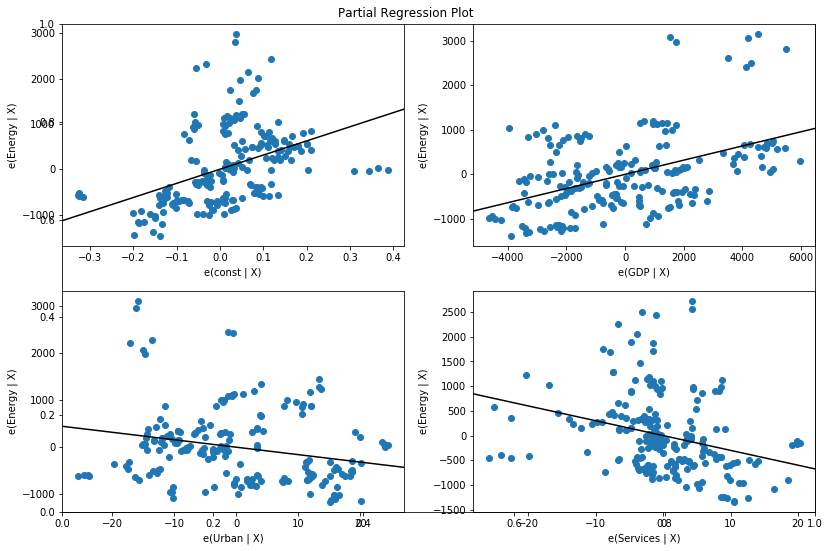

In [19]:
p=data_middle[['GDP','Urban','Services']]
#p=data[['2014_GDP']]
p=smf.add_constant(p)
p.head()

t=data_middle[['Energy']]
t.head()

model=smf.OLS(t,p).fit()
print(model.summary())


fig, ax=plt.subplots(figsize=(12,8))
fig = smf.graphics.plot_partregress_grid(model, fig=fig)

In [20]:
middle_income_coeff = list(model.tvalues)

# Low Income

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     64.23
Date:                Fri, 21 Dec 2018   Prob (F-statistic):           2.66e-30
Time:                        20:36:55   Log-Likelihood:                -1681.2
No. Observations:                 237   AIC:                             3370.
Df Residuals:                     233   BIC:                             3384.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6760    114.999      0.154      0.8

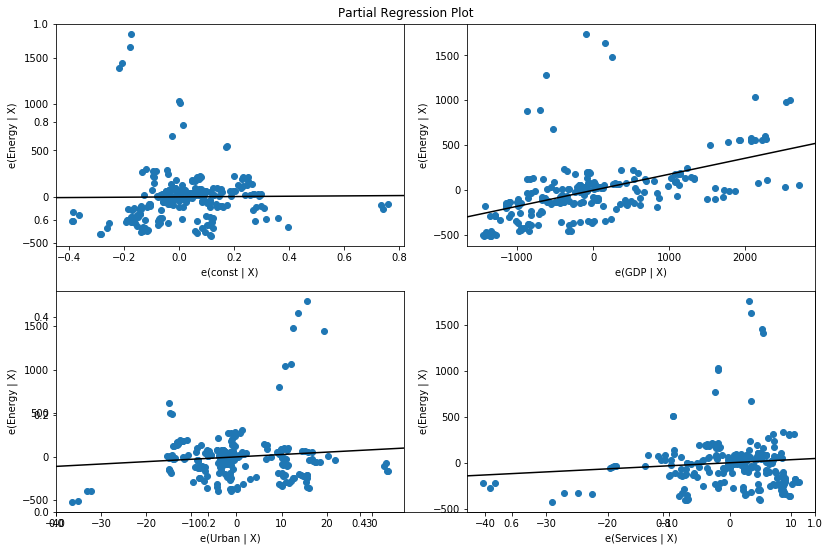

In [21]:
p=data_low[['GDP','Urban','Services']]
#p=data[['2014_GDP']]
p=smf.add_constant(p)
p.head()

t=data_low[['Energy']]
t.head()

model=smf.OLS(t,p).fit()
print(model.summary())


fig, ax=plt.subplots(figsize=(12,8))
fig = smf.graphics.plot_partregress_grid(model, fig=fig)

In [31]:
low_income_coeff = list(model.tvalues)

In [54]:
print([ combined_model_coeff[0], high_income_coeff[0], middle_income_coeff[0], low_income_coeff[0]])
print([ combined_model_coeff[1], high_income_coeff[1], middle_income_coeff[1], low_income_coeff[1]])
print([combined_model_coeff[2], high_income_coeff[2], middle_income_coeff[2], low_income_coeff[2]])
print([combined_model_coeff[3], high_income_coeff[3], middle_income_coeff[3], low_income_coeff[3]])

[6.0008878893835975, 5.551823237757189, 6.900164122112461, 0.1537051705996944]
[17.67569163536986, 4.973912758676553, 7.428590177648136, 8.80651617752576]
[7.558718271721758, 2.849683339406594, -3.433363355519905, 1.5763204220961533]
[-9.220842297974716, -10.034746283281255, -4.369026734541702, 1.457615748946877]


# PLOTTING ABSOLUTE F-VALUES FOR EACH COEFFICIENT OF EACH MODEL

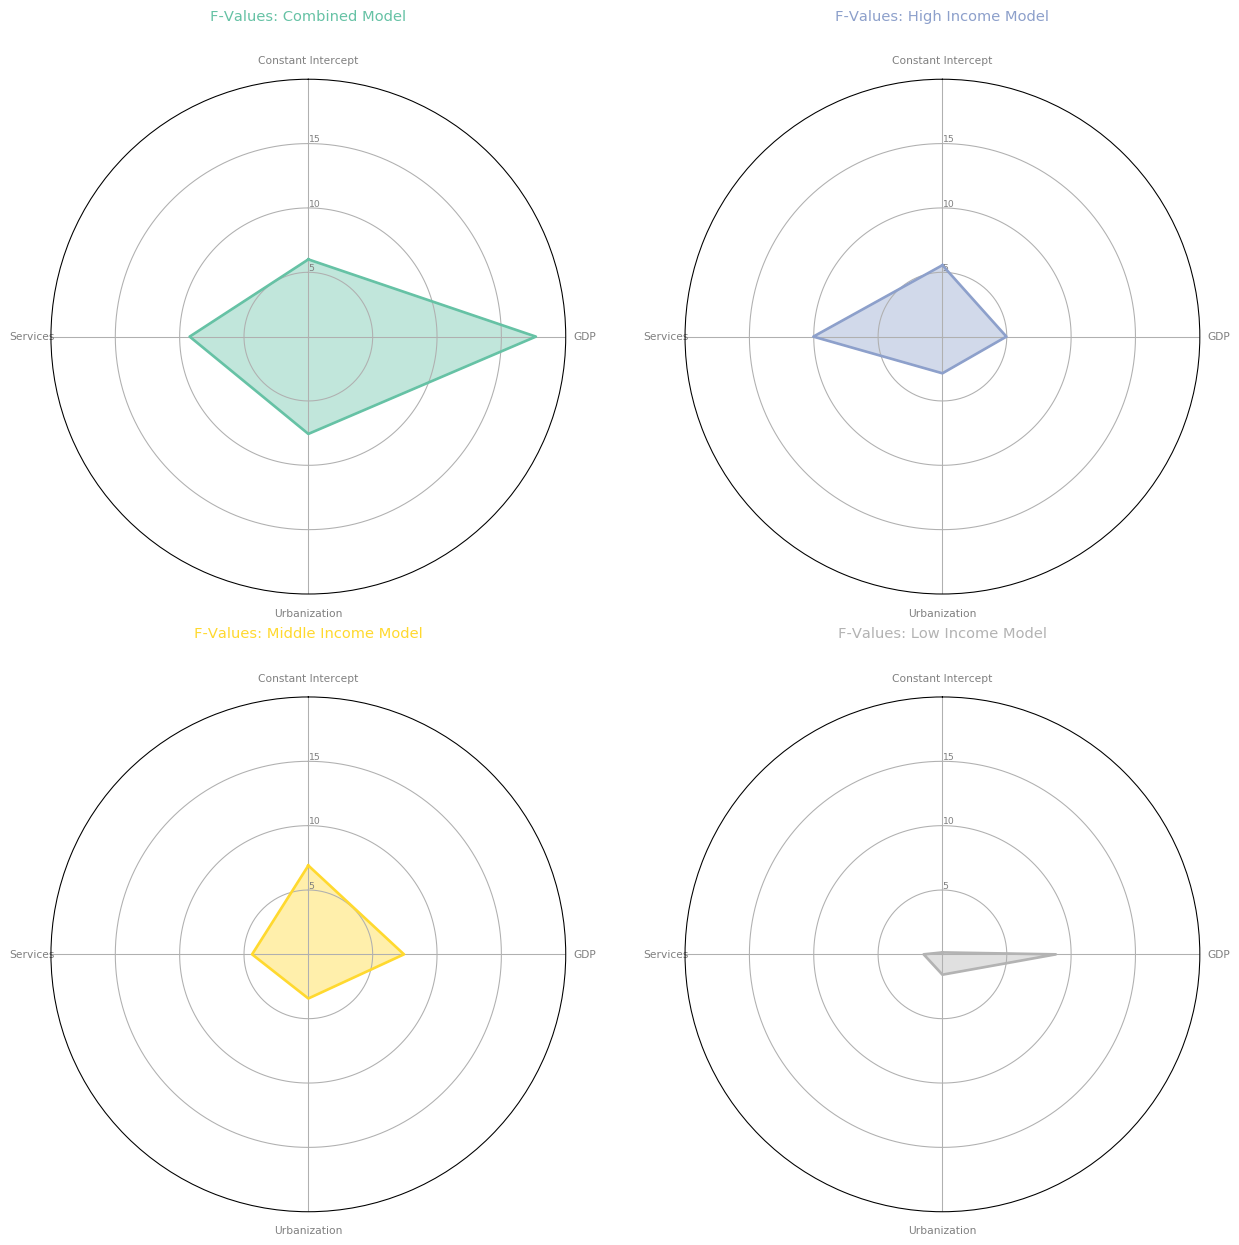

In [67]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'F-Values:': ['Combined Model','High Income Model','Middle Income Model','Low Income Model'],
'Constant Intercept':[6.00, 5.55, 6.901, 0.15],
'GDP': [17.68, 4.97, 7.43, 8.81],
'Urbanization': [7.56, 2.85, 3.43, 1.58],
'Services': [9.22, 10.03, 4.37, 1.46]
})
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
    # number of variable
    categories=list(df)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([5,10,15], ["5","10","15"], color="grey", size=7)
    plt.ylim(0,20)

    # Ind1
    values=df.loc[row].drop('F-Values:').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1500/my_dpi, 1500/my_dpi), dpi=my_dpi)
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='F-Values: '+df['F-Values:'][row], color=my_palette(row))
